In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pageviewapi

In [ ]:
import numpy as np
import pandas as pd
import os
import json
import re
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
import pageviewapi

In [13]:
# baseDir = '/home/sandesh/Documents/Data Science/Project'
# baseDir = '/content/drive/MyDrive/Time Series Analysis (Mini project)/Time Series Analysis (Mini project)'
baseDir = '/content/drive/MyDrive/6th Sem/Data Science/Time Series Analysis (Mini project)'
datasets = 'Datasets'
datapath1 = 'data_2015-17.csv'
datapath2 = 'json_files'

In [14]:
import sys
# sys.path.append(baseDir + '/utils')
# # Custom module to fill in the views if not already requested
# import dataFill 

In [15]:
dataframe = pd.read_csv(os.path.join(baseDir, datasets, datapath1), encoding="utf-8", parse_dates = True)
dataframe.head(10)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,...,46.0,24.0,22.0,22.0,11.0,25.0,45.0,39.0,17.0,18.0,13.0,57.0,18.0,14.0,19.0,39.0,22.0,16.0,28.0,21.0,37.0,58.0,25.0,23.0,25.0,47.0,44.0,26.0,24.0,21.0,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,...,39.0,20.0,31.0,19.0,7.0,11.0,20.0,13.0,16.0,16.0,47.0,21.0,20.0,12.0,13.0,20.0,22.0,20.0,12.0,37.0,14.0,34.0,16.0,31.0,34.0,33.0,32.0,29.0,34.0,25.0,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,...,22.0,8.0,4.0,3.0,1.0,3.0,7.0,3.0,1.0,9.0,4.0,2.0,6.0,3.0,3.0,3.0,8.0,2.0,4.0,3.0,6.0,23.0,11.0,8.0,6.0,13.0,12.0,8.0,12.0,9.0,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,...,37.0,14.0,12.0,13.0,11.0,10.0,14.0,15.0,15.0,11.0,19.0,9.0,19.0,8.0,17.0,11.0,18.0,20.0,11.0,11.0,21.0,42.0,23.0,17.0,11.0,21.0,20.0,20.0,110.0,15.0,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,39.0,66.0,114.0,19.0,29.0,12.0,11.0,14.0,14.0,63.0,12.0,22.0,14.0,20.0,11.0,23.0,66.0,19.0,23.0,23.0,41.0,25.0,22.0,20.0,24.0,29.0,20.0,17.0,24.0,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,7.0,12.0,11.0,7.0,9.0,6.0,10.0,8.0,13.0,3.0,14.0,4.0,9.0,14.0,10.0,8.0,3.0,74.0,17.0,8.0,6.0,9.0,3.0,10.0,21.0,9.0,5.0,3.0,4.0,1.0,...,41.0,35.0,18.0,18.0,15.0,16.0,13.0,14.0,29.0,18.0,28.0,21.0,10.0,19.0,13.0,8.0,54.0,19.0,14.0,41.0,32.0,46.0,31.0,29.0,31.0,28.0,17.0,16.0,8.0,13.0,13.0,13.0,45.0,4.0,13.0,20.0,18.0,17.0,14.0,11.0
6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.0,33.0,8.0,7.0,5.0,12.0,7.0,9.0,11.0,8.0,10.0,10.0,7.0,51.0,12.0,10.0,14.0,11.0,9.0,9.0,9.0,68.0,8.0,40.0,6.0,14.0,11.0,6.0,9.0,7.0,12.0,8.0,5.0,7.0,8.0,10.0,8.0,5.0,3.0,5.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,32.0,17.0,23.0,47.0,33.0,47.0,58.0,29.0,187.0,128.0,34.0,38.0,8.0,38.0,17.0,45.0,14.0,15.0,56.0,30.0,15.0,115.0,6.0,25.0,10.0,135.0,40.0,63.0,32.0,35.0,...,43.0,33.0,20.0,

In [16]:
def getLanguages(page):
    lan= re.search("[a-z][a-z].wikipedia.org", page)
    if lan:
        return lan[0][0:2]
    return("na")

dataframe["lang"]= dataframe.Page.map(getLanguages)

In [17]:
dataframe

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,lang
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,...,24.0,22.0,22.0,11.0,25.0,45.0,39.0,17.0,18.0,13.0,57.0,18.0,14.0,19.0,39.0,22.0,16.0,28.0,21.0,37.0,58.0,25.0,23.0,25.0,47.0,44.0,26.0,24.0,21.0,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,...,20.0,31.0,19.0,7.0,11.0,20.0,13.0,16.0,16.0,47.0,21.0,20.0,12.0,13.0,20.0,22.0,20.0,12.0,37.0,14.0,34.0,16.0,31.0,34.0,33.0,32.0,29.0,34.0,25.0,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,...,8.0,4.0,3.0,1.0,3.0,7.0,3.0,1.0,9.0,4.0,2.0,6.0,3.0,3.0,3.0,8.0,2.0,4.0,3.0,6.0,23.0,11.0,8.0,6.0,13.0,12.0,8.0,12.0,9.0,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,...,14.0,12.0,13.0,11.0,10.0,14.0,15.0,15.0,11.0,19.0,9.0,19.0,8.0,17.0,11.0,18.0,20.0,11.0,11.0,21.0,42.0,23.0,17.0,11.0,21.0,20.0,20.0,110.0,15.0,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.0,66.0,114.0,19.0,29.0,12.0,11.0,14.0,14.0,63.0,12.0,22.0,14.0,20.0,11.0,23.0,66.0,19.0,23.0,23.0,41.0,25.0,22.0,20.0,24.0,29.0,20.0,17.0,24.0,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0,zh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,3.0,4.0,3.0,2.0,2.0,0.0,3.0,1.0,1.0,0.0,2.0,2.0,1.0,6.0,2.0,3.0,3.0,2.0,7.0,6.0,8.0,5.0,7.0,7.0,7.0,8.0,2.0,0.0,4.0,3.0,6.0,5.0,2.0,4.0,4.0,8.0,2.0,es
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,1.0,2.0,3.0,3.0,18.0,4.0,5.0,3.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,3.0,9.0,10.0,8.0,6.0,3.0,9.0,2.0,11.0,3.0,3.0,4.0,4.0,7.0,5.0,0.0,5.0,5.0,2.0,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


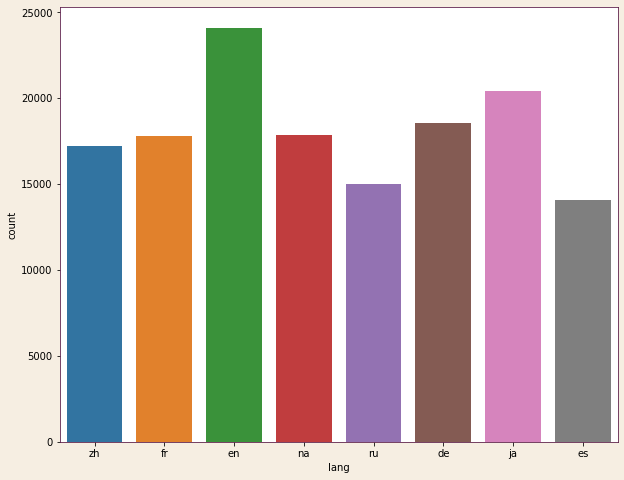

In [47]:
plt.figure(figsize=[10,8])
sns.countplot(dataframe["lang"])

In [19]:
set(dataframe['lang'])

{'de', 'en', 'es', 'fr', 'ja', 'na', 'ru', 'zh'}

In [20]:
lang_ja = dataframe[dataframe['lang'] == 'ja']
lang_es = dataframe[dataframe['lang'] == 'es']
lang_de = dataframe[dataframe['lang'] == 'de']
lang_zh = dataframe[dataframe['lang'] == 'zh']
lang_fr = dataframe[dataframe['lang'] == 'fr']
lang_ru = dataframe[dataframe['lang'] == 'ru']
lang_na = dataframe[dataframe['lang'] == 'na']
lang_en = dataframe[dataframe['lang'] == 'en']

In [21]:
start = '2015-07-01'
end = '2017-09-10'

In [22]:
def plot_graph(df,n_series):
    sample = df.sample(n_series,random_state=42)
    page = sample["Page"].to_list()
    series_sample = sample.loc[:,start:end]
    plt.figure(figsize=(10,6))
    
    
    for i in range(series_sample.shape[0]):
        np.log1p(pd.Series(series_sample.iloc[i]).astype(np.float64)).plot(linewidth=1.5)
    
    plt.title("Time vs Views on random website")
    plt.legend(page)
    plt.tight_layout()



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 34425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32023 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20489 missing from current font.
  font.set_

(None, None, None, None, None, None, None, None)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 34425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32023 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20489 missing from current font.
  font.set_

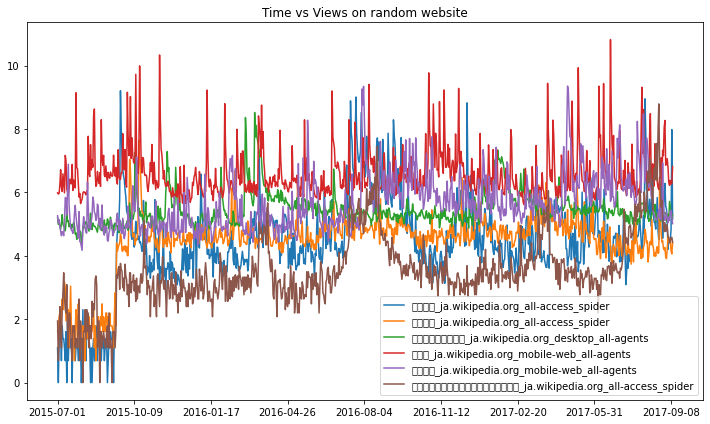

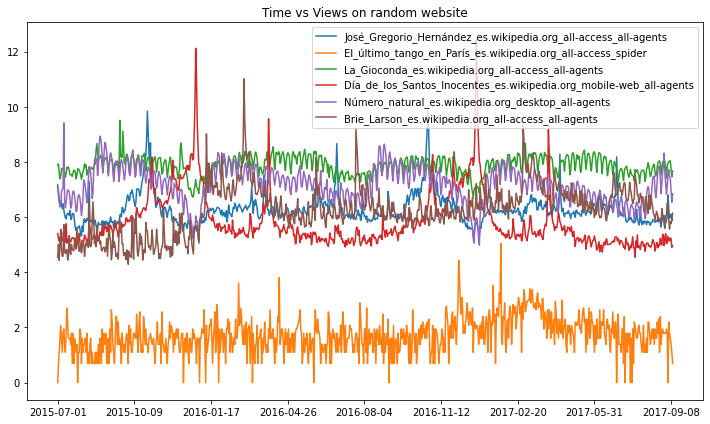

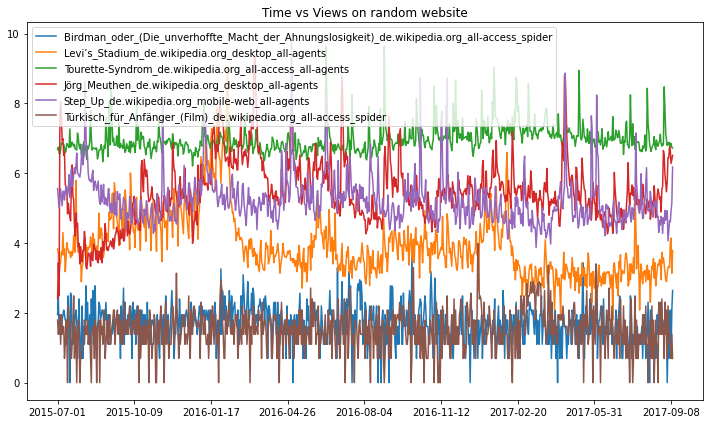

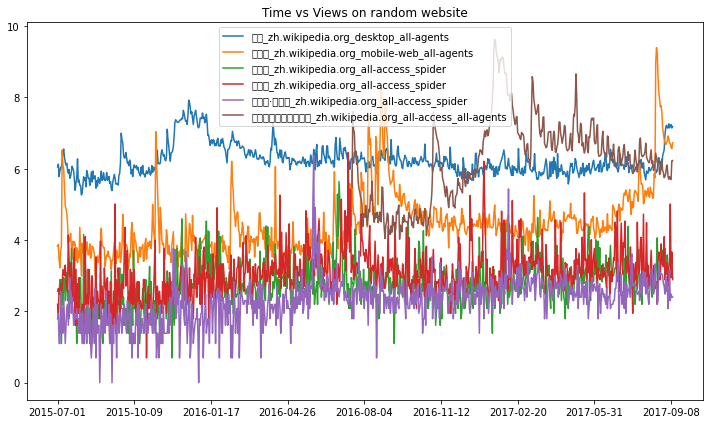

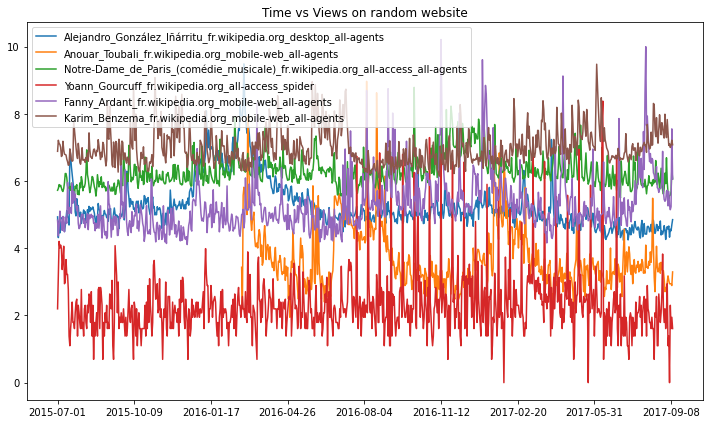

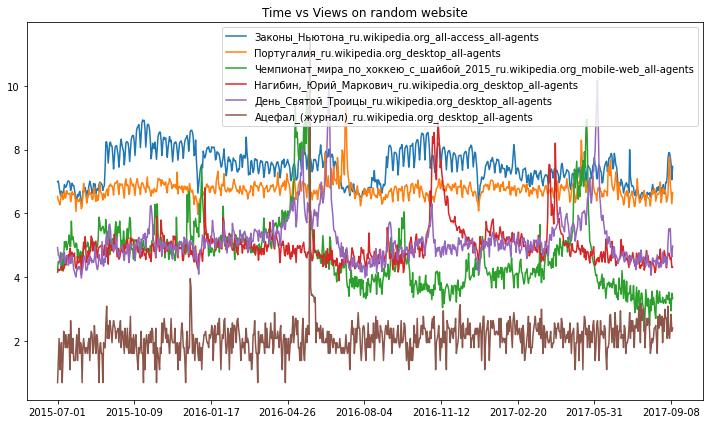

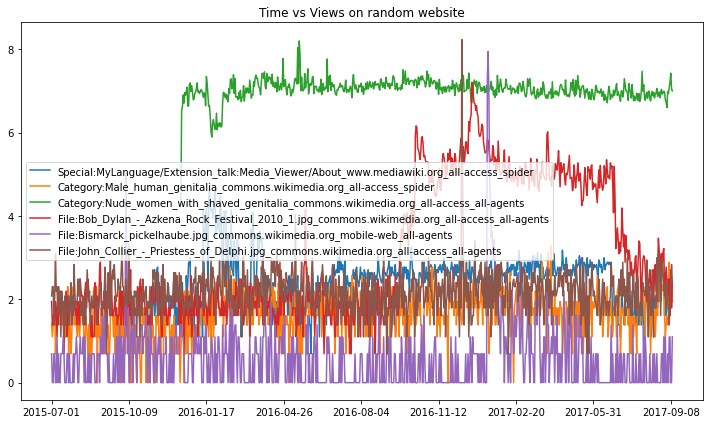

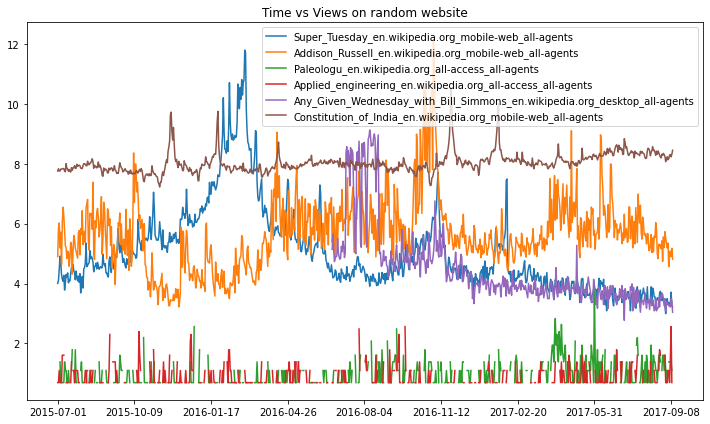

In [23]:
plot_graph(lang_ja,6), plot_graph(lang_es,6), plot_graph(lang_de,6), plot_graph(lang_zh,6), plot_graph(lang_fr,6), plot_graph(lang_ru,6),plot_graph(lang_na,6), plot_graph(lang_en,6)

In [24]:
#Sample Dataset
samplePlot = dataframe.iloc[:101, 1:-1].T.reset_index().rename(columns = {'index': 'Date', 100 : 'Views1', 101:'Views2'})
samplePlot['Date'] = pd.to_datetime(samplePlot['Date'], errors='coerce')
samplePlot.set_index('Date')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,Views1
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,6.0,NaN,2.0,2.0,NaN,8.0,40.0,61.0,4.0,13.0,NaN,22.0,25.0,19.0,23.0,NaN,11.0,22.0,NaN,291.0,3.0,10.0,2.0,1.0,4.0,26.0,13.0,1.0,NaN,NaN,1.0,...,14.0,1.0,21.0,NaN,44.0,NaN,8.0,NaN,0.0,NaN,20.0,67.0,NaN,10.0,11.0,34.0,3.0,NaN,7.0,1.0,NaN,NaN,NaN,56.0,24.0,9.0,28.0,8.0,NaN,2.0,NaN,0.0,8.0,NaN,NaN,0.0,NaN,3.0,NaN,0.0
2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,3.0,NaN,1.0,5.0,NaN,27.0,17.0,33.0,8.0,7.0,NaN,11.0,3.0,6.0,24.0,NaN,5.0,67.0,NaN,64.0,53.0,9.0,0.0,10.0,4.0,30.0,29.0,2.0,NaN,NaN,4.0,...,13.0,4.0,5.0,NaN,31.0,NaN,2.0,NaN,1.0,NaN,3.0,34.0,NaN,1.0,18.0,10.0,5.0,0.0,5.0,0.0,NaN,NaN,NaN,25.0,11.0,4.0,14.0,4.0,NaN,6.0,NaN,0.0,7.0,NaN,NaN,0.0,NaN,9.0,NaN,8.0
2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,5.0,NaN,4.0,5.0,NaN,9.0,25.0,21.0,4.0,14.0,NaN,23.0,3.0,12.0,31.0,NaN,13.0,26.0,NaN,26.0,11.0,5.0,1.0,17.0,5.0,22.0,7.0,3.0,NaN,NaN,3.0,...,14.0,4.0,10.0,NaN,18.0,NaN,9.0,NaN,4.0,NaN,10.0,15.0,NaN,5.0,23.0,16.0,5.0,1.0,9.0,1.0,NaN,NaN,NaN,7.0,24.0,9.0,6.0,6.0,NaN,5.0,NaN,1.0,17.0,NaN,NaN,0.0,NaN,12.0,NaN,6.0
2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,12.0,NaN,4.0,1.0,NaN,25.0,42.0,10.0,9.0,11.0,NaN,10.0,4.0,14.0,9.0,NaN,8.0,34.0,NaN,20.0,3.0,4.0,5.0,10.0,52.0,27.0,1.0,2.0,NaN,NaN,5.0,...,13.0,2.0,25.0,NaN,34.0,NaN,12.0,NaN,1.0,NaN,14.0,9.0,NaN,14.0,23.0,10.0,3.0,2.0,3.0,3.0,NaN,NaN,NaN,50.0,19.0,11.0,24.0,8.0,NaN,21.0,NaN,0.0,11.0,NaN,NaN,0.0,NaN,14.0,NaN,4.0
2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,6.0,NaN,2.0,3.0,NaN,25.0,41.0,26.0,7.0,20.0,NaN,6.0,12.0,13.0,21.0,NaN,6.0,38.0,NaN,28.0,4.0,15.0,5.0,4.0,2.0,27.0,2.0,4.0,NaN,NaN,3.0,...,26.0,4.0,23.0,NaN,56.0,NaN,13.0,NaN,5.0,NaN,4.0,9.0,NaN,6.0,51.0,13.0,8.0,NaN,5.0,0.0,NaN,NaN,NaN,90.0,17.0,10.0,14.0,10.0,NaN,4.0,NaN,0.0,8.0,NaN,NaN,0.0,NaN,6.0,NaN,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-06,27.0,25.0,7.0,16.0,23.0,20.0,10.0,44.0,44.0,32.0,14.0,12.0,4.0,25.0,48.0,66.0,30.0,16.0,8.0,15.0,30.0,17.0,15.0,40.0,17.0,21.0,32.0,6.0,48.0,13.0,15.0,17.0,14.0,20.0,36.0,34.0,7.0,12.0,26.0,9.0,...,62.0,6.0,27.0,11.0,109.0,22.0,34.0,12.0,11.0,10.0,14.0,11.0,19.0,19.0,26.0,37.0,11.0,3.0,6.0,5.0,10.0,14.0,4.0,14.0,17.0,36.0,10.0,14.0,12.0,16.0,5.0,5.0,4.0,17.0,5.0,30.0,13.0,10.0,16.0,7.0
2017-09-07,29.0,26.0,3.0,19.0,28.0,18.0,8.0,25.0,33.0,34.0,44.0,6.0,2.0,13.0,38.0,24.0,77.0,8.0,22.0,7.0,46.0,22.0,12.0,60.0,14.0,14.0,56.0,9.0,67.0,11.0,19.0,12.0,10.0,71.0,58.0,169.0,8.0,12.0,30.0,8.0,...,39.0,7.0,23.0,11.0,82.0,124.0,34.0,8.0,4.0,5.0,20.0,8.0,27.0,28.0,35.0,43.0,13.0,4.0,7.0,5.0,10.0,23.0,3.0,19.0,17.0,24.0,6.0,26.0,6.0,55.0,32.0,9.0,10.0,26.0,13.0,22.0,11.0,16.0,14.0,14.0
2017-09-08,23.0,23.0,4.0,30.0,14.0,17.0,5.0,39.0,52.0,29.0,62.0,8.0,6.0,34.0,85.0,37.0,32.0,14.0,12.0,10.0,19.0,26.0,18.0,39.0,15.0,19.0,62.0,16.0,29.0,12.0,12.0,11.0,11.0,18.0,27.0,57.0,9.0,7.0,34.0,8.0,...,101.0,8.0,17.0,16.0,87.0,42.0,26.0,11.0,7.0,9.0,12.0,12.0,18.0,17.0,24.0,30.0,12.0,5.0,9.0,3.0,7.0,101.0,2.0,36.0,12.0,36.0,9.0,17.0,7.0,12.0,6.0,7.0,10.0,16.0,5.0,14.0,8.0,11.0,9.0,6.0


In [35]:
plt.rc_context({'axes.edgecolor':'#581845', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'#f6eee2'})

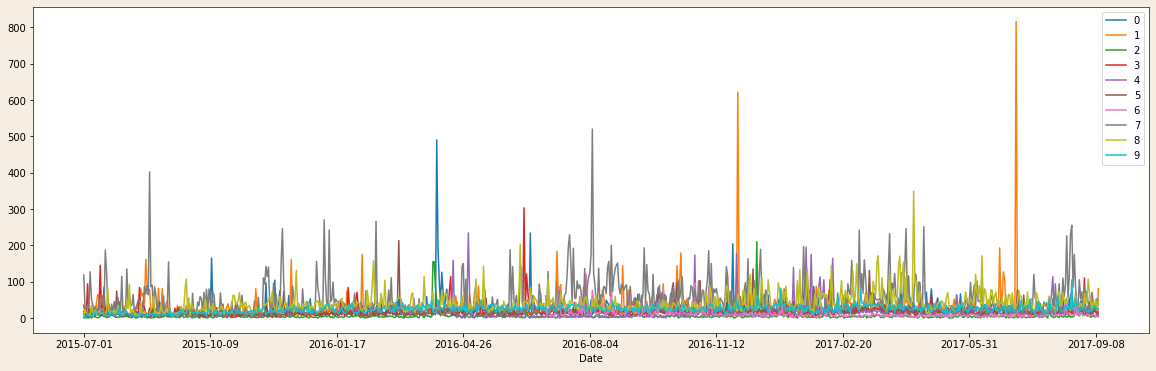

In [36]:
samplePlot = dataframe.iloc[:10, 1:-1].T.reset_index().rename(columns = {'index': 'Date'})
samplePlot.plot(x = 'Date', figsize = [20,6])

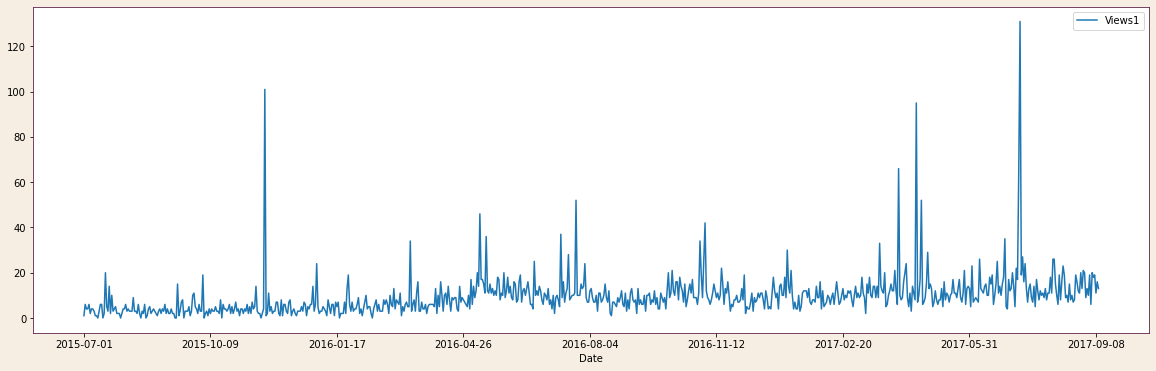

In [37]:
samplePlot = dataframe.iloc[[1000], 1:-1].T.reset_index().rename(columns = {'index': 'Date', 1000 : 'Views1'})
samplePlot.plot(x = 'Date', figsize = [20,6])

Text(0, 0.5, 'Views')

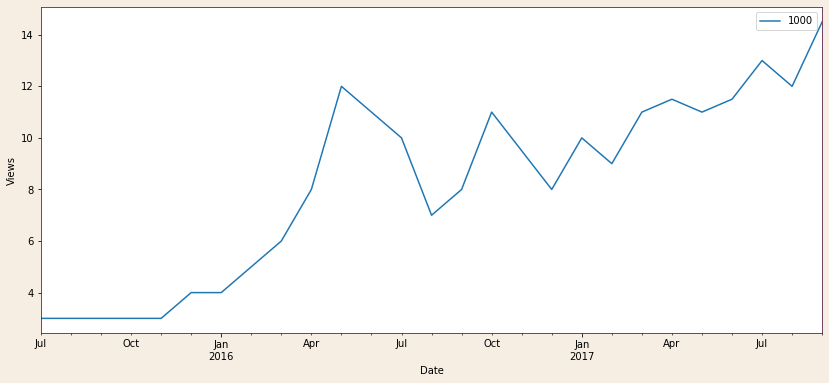

In [38]:
samplePlot = dataframe.iloc[[1000], 1:-1].T.reset_index().rename(columns = {'index': 'Date'})
samplePlot['Date'] = pd.to_datetime(samplePlot['Date'], errors='coerce')
samplePlot.resample('M', on = 'Date').median().plot(figsize = [14,6])
plt.ylabel('Views')

Text(0, 0.5, 'Views')

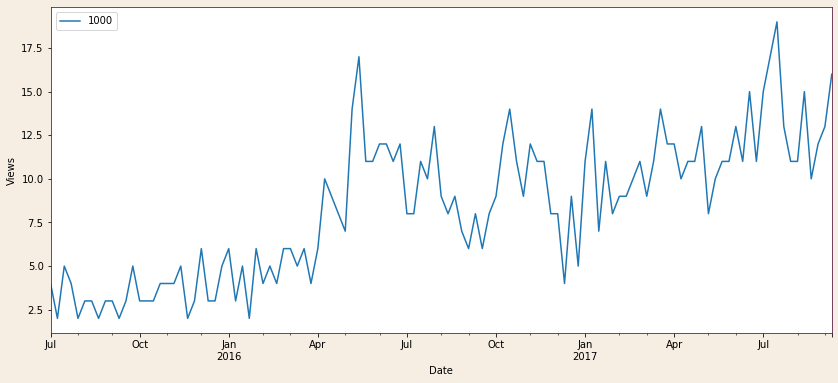

In [39]:
# Resampling
samplePlotW = dataframe.iloc[[1000], 1:-1].T.reset_index().rename(columns = {'index': 'Date'})
samplePlotW['Date'] = pd.to_datetime(samplePlotW['Date'], errors='coerce')
samplePlotW = samplePlotW.resample('W', on = 'Date').median()
samplePlotW.plot(figsize = [14,6])
plt.ylabel('Views')

In [40]:
samplePlotW

,1000
Date,
2015-07-05,4.0
2015-07-12,2.0
2015-07-19,5.0
2015-07-26,4.0
2015-08-02,2.0
...,...
2017-08-13,15.0
2017-08-20,10.0
2017-08-27,12.0


In [41]:
samplePlotW = dataframe.iloc[[1000], 1:-1].T.reset_index().rename(columns = {'index': 'Date'})

#TODO : create a function to convert column to datatime type
samplePlotW['Date'] = pd.to_datetime(samplePlotW['Date'], errors='coerce')

samplePlotW = samplePlotW.resample('W', on = 'Date').median()

#TODO : create a function that accepts n number of df's to plot 
samplePlot['Date'] = pd.to_datetime(samplePlot['Date'], errors = 'coerce')
samplePlot = samplePlot.set_index('Date')

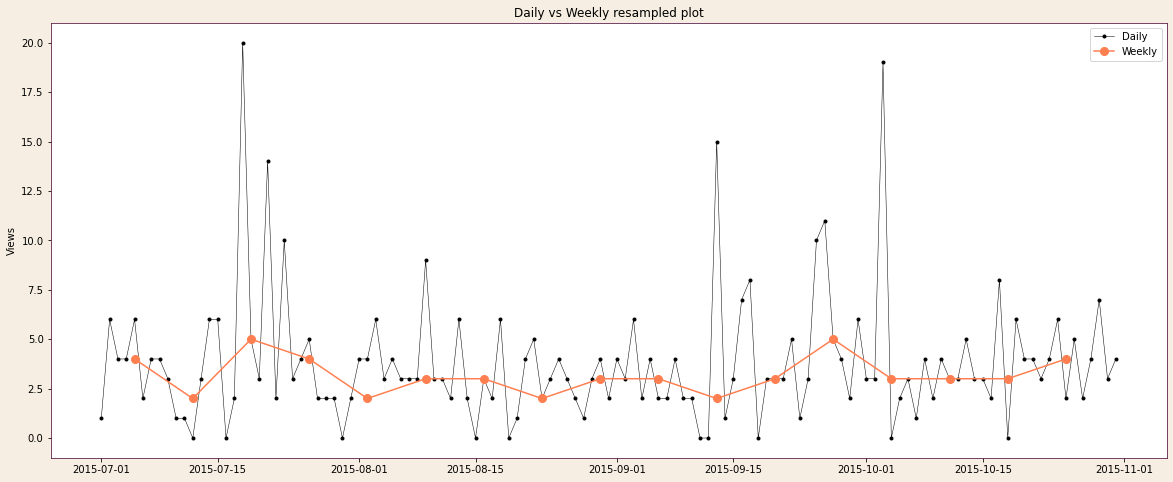

In [42]:
# daily vs weekly resampled plot
fig, ax = plt.subplots(figsize=(20,8))
#TODO : create a function that accepts n number of df's to plot 

ax.plot(samplePlot.loc['2015-01':'2015-10', :], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
ax.plot(samplePlotW.loc['2015-01':'2015-10' , :], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
ax.set_ylabel("Views")
ax.legend()
plt.title('Daily vs Weekly resampled plot')
plt.show()

In [43]:
samplePlotW

,1000
Date,
2015-07-05,4.0
2015-07-12,2.0
2015-07-19,5.0
2015-07-26,4.0
2015-08-02,2.0
...,...
2017-08-13,15.0
2017-08-20,10.0
2017-08-27,12.0


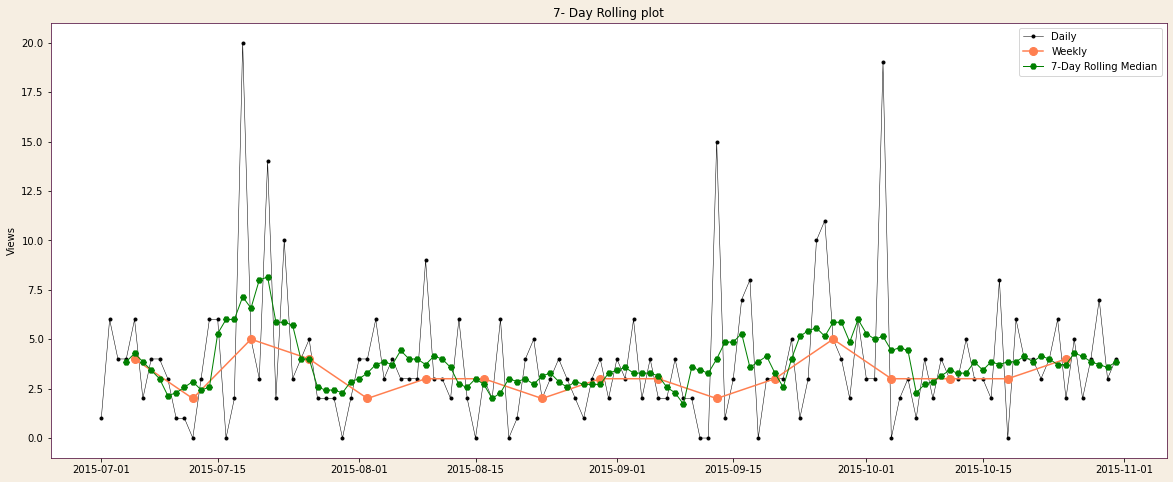

In [44]:
# Rolling plot
rollingPlot = samplePlot.rolling(7, center = True).mean()
#TODO : create a function that accepts n number of df's to plot 

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(samplePlot.loc['2015-01':'2015-10', :], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
ax.plot(samplePlotW.loc['2015-01':'2015-10' , :], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
ax.plot(rollingPlot.loc['2015-01':'2015-10', :], marker='H', linestyle='-', linewidth = 1, label='7-Day Rolling Median',color='green')
ax.set_ylabel("Views")
ax.legend()
plt.title('7- Day Rolling plot')
plt.show()

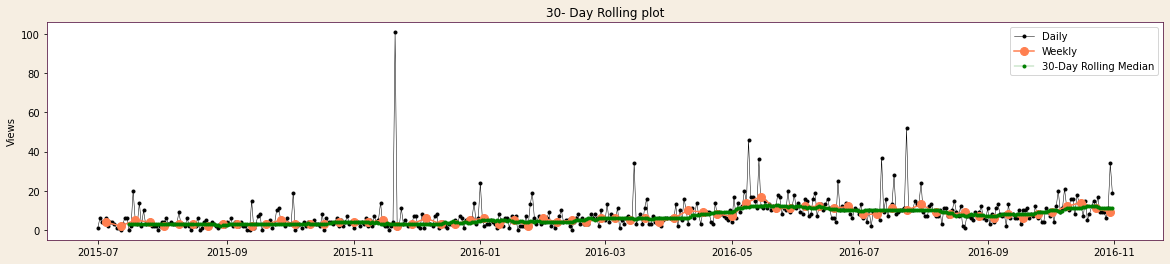

In [49]:
rollingPlot = samplePlot.rolling(30, center = True).median()

#TODO : create a function that accepts n number of df's to plot 

fig, ax = plt.subplots(figsize=(20,4))
ax.plot(samplePlot.loc['2015-01':'2016-10', :], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
ax.plot(samplePlotW.loc['2015-01':'2016-10' , :], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
ax.plot(rollingPlot.loc['2015-01':'2016-10', :], marker='.', linestyle='-', linewidth = 0.3, label='30-Day Rolling Median',color='green')
ax.set_ylabel("Views")
ax.legend()
plt.title('30- Day Rolling plot')
plt.show()

In [45]:
flattenedData = pd.melt(dataframe[])